In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [3]:
quarter_df = pd.read_csv(r"C:\Users\assis\Downloads\Quarterly_London_crime.csv")
quarter_df

,LSOA Code,Quarter,LSOA Name,Borough,Year,ARSON AND CRIMINAL DAMAGE_rate,BURGLARY_rate,DRUG OFFENCES_rate,MISCELLANEOUS CRIMES AGAINST SOCIETY_rate,POSSESSION OF WEAPONS_rate,PUBLIC ORDER OFFENCES_rate,ROBBERY_rate,VEHICLE OFFENCES_rate,VIOLENCE AGAINST THE PERSON_rate,THEFT_rate,Median age mid-year,Male Population,Female Population,Total Population
0,E01000006,2011Q1,Barking and Dagenham 016A,Barking and Dagenham,2011,0.000000,2.310803,0.577701,0.00000,0.000000,0.000000,0.577701,3.466205,1.155402,3.466205,31.2,882.0,849.0,1731.0
1,E01000006,2011Q2,Barking and Dagenham 016A,Barking and Dagenham,2011,0.000000,2.310803,1.733102,0.00000,0.000000,0.577701,1.155402,4.621606,2.310803,0.577701,31.2,882.0,849.0,1731.0
2,E01000006,2011Q3,Barking and Dagenham 016A,Barking and Dagenham,2011,2.310803,2.310803,1.733102,0.00000,0.000000,0.577701,1.155402,2.888504,1.733102,1.733102,31.2,882.0,849.0,1731.0
3,E01000006,2011Q4,Barking and Dagenham 016A,Barking and Dagenham,2011,0.000000,2.310803,1.733102,0.00000,0.000000,0.577701,2.310803,5.777008,2.310803,1.155402,31.2,882.0,849.0,1731.0
4,E01000006,2012Q1,Barking and Dagenham 016A,Barking and Dagenham,2012,0.562114,2.810568,0.000000,0.00000,0.000000,0.562114,0.562114,3.934795,3.372681,0.000000,31.3,922.0,857.0,1779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199515,E01035722,2019Q4,Westminster 024G,Westminster,2019,1.261034,2.101723,0.000000,0.00000,1.261034,0.420345,2.101723,2.101723,3.362757,4.623792,37.3,1145.0,1234.0,2379.0
199516,E01035722,2020Q1,Westminster 024G,Westminster,2020,0.000000,3.487358,0.871840,0.43592,0.000000,1.743679,0.435920,3.051439,5.231037,2.615519,36.8,1123.0,1171.0,2294.0
199517,E01035722,2020Q2,Westminster 024G,Westminster,2020,0.000000,1.743679,1.307759,0.00000,0.000000,0.435920,0.000000,1.307759,6.538797,0.871840,36.8,1123.0,1171.0,2294.0
199518,E01035722,2020Q3,Westminster 024G,Westminster,2020,1.743679,0.435920,2.615519,0.00000,0.435920,1.743679,0.000000,3.487358,3.487358,4.795118,36.8,1123.0,1171.0,2294.0


# Defining exceptionality
## Normalisation

In [5]:
global_mean = quarter_df['THEFT_rate'].mean()
global_std = quarter_df['THEFT_rate'].std()

quarter_df['theft_z'] = (quarter_df['THEFT_rate'] - global_mean) / global_std

## Setting threshold

In [7]:
threshold = 2
quarter_df['theft_exception'] = (quarter_df['theft_z'].abs() > threshold).astype(int)

In [9]:
quarter_df[quarter_df['theft_exception'] == 1]

,LSOA Code,Quarter,LSOA Name,Borough,Year,ARSON AND CRIMINAL DAMAGE_rate,BURGLARY_rate,DRUG OFFENCES_rate,MISCELLANEOUS CRIMES AGAINST SOCIETY_rate,POSSESSION OF WEAPONS_rate,...,ROBBERY_rate,VEHICLE OFFENCES_rate,VIOLENCE AGAINST THE PERSON_rate,THEFT_rate,Median age mid-year,Male Population,Female Population,Total Population,theft_z,theft_exception
5918,E01000164,2020Q3,Barnet 022D,Barnet,2020,2.312139,3.468208,0.000000,0.578035,0.000000,...,1.734104,16.184971,8.670520,73.988439,36.4,847.0,883.0,1730.0,2.753271,1
8167,E01000221,2012Q4,Barnet 039B,Barnet,2012,1.508296,2.262443,2.262443,1.508296,0.754148,...,2.262443,15.837104,3.770739,58.823529,31.3,629.0,697.0,1326.0,2.135358,1
8179,E01000221,2015Q4,Barnet 039B,Barnet,2015,1.511716,2.267574,3.023432,0.000000,0.755858,...,1.511716,16.628874,7.558579,61.980348,32.7,603.0,720.0,1323.0,2.263986,1
8181,E01000221,2016Q2,Barnet 039B,Barnet,2016,2.304147,3.072197,6.144393,0.000000,0.000000,...,1.536098,16.897081,13.056836,62.980031,33.9,579.0,723.0,1302.0,2.304720,1
8182,E01000221,2016Q3,Barnet 039B,Barnet,2016,6.912442,0.768049,2.304147,0.768049,0.000000,...,0.768049,8.448541,13.824885,56.835637,33.9,579.0,723.0,1302.0,2.054359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199335,E01035718,2014Q4,Westminster 019G,Westminster,2014,1.774623,3.253475,7.098492,1.774623,0.591541,...,5.915410,7.098492,11.535049,57.083703,20.9,2106.0,1275.0,3381.0,2.064467,1
199343,E01035718,2016Q4,Westminster 019G,Westminster,2016,1.169591,2.631579,5.847953,1.169591,2.339181,...,2.631579,6.725146,8.771930,64.035088,21.2,2074.0,1346.0,3420.0,2.347709,1
199351,E01035718,2018Q4,Westminster 019G,Westminster,2018,2.398082,2.697842,12.889688,1.498801,3.597122,...,5.695444,13.489209,16.187050,78.836930,21.3,2035.0,1301.0,3336.0,2.950828,1
199354,E01035718,2019Q3,Westminster 019G,Westminster,2019,0.606796,3.337379,22.451456,0.000000,0.606796,...,15.169903,20.024272,19.720874,68.264563,21.3,1939.0,1357.0,3296.0,2.520044,1


### Extras

In [11]:
def label_runs(group):
    group = group.sort_values('Quarter')
    
    group['start_of_exception'] = ((group['theft_exception'] == 1) & 
                                   (group['theft_exception'].shift(1) != 1)).astype(int)
    
    group['end_of_exception'] = ((group['theft_exception'] == 0) & 
                                 (group['theft_exception'].shift(1) == 1)).astype(int)
    
    return group

quarter_df = quarter_df.groupby('LSOA Code').apply(label_runs).reset_index(drop=True)

C:\Users\assis\AppData\Local\Temp\ipykernel_22428\1622487910.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarter_df = quarter_df.groupby('LSOA Code').apply(label_runs).reset_index(drop=True)


In [12]:
quarter_df['run_id'] = quarter_df.groupby('LSOA Code')['start_of_exception'].cumsum()
quarter_df['run_id'] = quarter_df['run_id'].where(quarter_df['theft_exception']==1)

# Wouter's Beam Search

In [15]:
"""
The following code was adapted from W. Duivesteijn, T.C. van Dijk. (2021)
    Exceptional Gestalt Mining: Combining Magic Cards to Make Complex Coalitions Thrive. 
    In: Proceedings of the 8th Workshop on Machine Learning and Data Mining for Sports Analytics.
    Available from http://wwwis.win.tue.nl/~wouter/Publ/J05-EMM_DMKD.pdf
"""

# Package imports
import heapq
import numpy as np

# Classes
class BoundedPriorityQueue:
    """
    Used to store the <q> most promising subgroups
    Ensures uniqness
    Keeps a maximum size (throws away value with least quality)
    """

    def __init__(self, bound): 
        # Initializes empty queue with maximum length of <bound>
        self.values = []
        self.bound = bound
        self.entry_count = 0

    def add(self, element, quality, **adds): 
        # Adds <element> to the bounded priority queue if it is of sufficient quality
        new_entry = (quality, self.entry_count, element, adds)
        if (len(self.values) >= self.bound):
            heapq.heappushpop(self.values, new_entry)
        else:
            heapq.heappush(self.values, new_entry)

        self.entry_count += 1

    def get_values(self):
        # Returns elements in bounded priority queue in sorted order
        for (q, _, e, x) in sorted(self.values, reverse=True):
            yield (q, e, x)

    def show_contents(self):  
        # Prints contents of the bounded priority queue (used for debugging)
        print("show_contents")
        for (q, entry_count, e) in self.values:
            print(q, entry_count, e)

class Queue:
    """
    Used to store candidate solutions
    Ensures uniqness
    """

    def __init__(self): # Initializes empty queue
        self.items = []

    def is_empty(self): # Returns True if queue is empty, False otherwise
        return self.items == []

    def enqueue(self, item): # Adds <item> to queue if it is not already present
        if item not in self.items:
            self.items.insert(0, item)

    def dequeue(self): # Pulls one item from the queue
        return self.items.pop()

    def size(self): # Returns the number of items in the queue
        return len(self.items)

    def get_values(self): # Returns the queue (as a list)
        return self.items

    def add_all(self, iterable): # Adds all items in <iterable> to the queue, given they are not already present
        for item in iterable:
            self.enqueue(item)

    def clear(self): # Removes all items from the queue
        self.items.clear()
        
# Functions
def refine(desc, more):
    # Creates a copy of the seed <desc> and adds it to the new selector <more>
    # Used to prevent pointer issues with selectors
    copy = desc[:]
    copy.append(more)
    return copy

def as_string(desc):
    # Adds ' and ' to <desc> such that selectors are properly separated when the refine function is used
    return ' and '.join(desc)

def eta(seed, df, features, n_chunks = 5):
    # Returns a generator which includes all possible refinements of <seed> for the given <features> on dataset <df>
    # n_chunks refers to the number of possible splits we consider for numerical features
    
    print("eta ", seed)
    if seed != []:              #we only specify more on the elements that are still in the subset
        d_str = as_string(seed)
        ind = df.eval(d_str)
        df_sub = df.loc[ind, ]
    else:
        df_sub = df
    for f in features:
        if (df_sub[f].dtype == 'float64') or (df_sub[f].dtype == 'float32'): #get quantiles here instead of intervals for the case that data are very skewed
            column_data = df_sub[f]
            dat = np.sort(column_data)
            dat = dat[np.logical_not(np.isnan(dat))]
            for i in range(1,n_chunks+1): #determine the number of chunks you want to divide your data in
                x = np.percentile(dat,100/i) #
                candidate = "{} <= {}".format(f, x)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
                candidate = "{} > {}".format(f, x)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
        elif (df_sub[f].dtype == 'object'):
            column_data = df_sub[f]
            uniq = column_data.dropna().unique()
            for i in uniq:
                candidate = "{} == '{}'".format(f, i)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
                candidate = "{} != '{}'".format(f, i)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
        elif (df_sub[f].dtype == 'int64'):
            column_data = df_sub[f]
            dat = np.sort(column_data)
            dat = dat[np.logical_not(np.isnan(dat))]
            for i in range(1,n_chunks+1): #determine the number of chunks you want to divide your data in
                x = np.percentile(dat,100/i) #
                candidate = "{} <= {}".format(f, x)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
                candidate = "{} > {}".format(f, x)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
        elif (df_sub[f].dtype == 'bool'):
            uniq = column_data.dropna().unique()
            for i in uniq:
                candidate = "{} == '{}'".format(f, i)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
                candidate = "{} != '{}'".format(f, i)
                if not candidate in seed: # if not already there
                    yield refine(seed, candidate)
        else:
            assert False
            
def satisfies_all(desc, df, threshold=0.02):
    # Function used to check if subgroup with pattern <desc> is sufficiently big relative to its dataset <df>
    # A subgroup is sufficiently big if the proportion of data included in it exceeds <threshold>   
    d_str = as_string(desc)
    ind = df.eval(d_str)
    return sum(ind) >= len(df) * 0.02 

def eval_quality(desc, df, target):
    # Function used to calculate the solution's WRAcc
    sub_group = df[df.eval(as_string(desc))] 
    prop_p_sg = len(sub_group[sub_group[target]==1])/len(sub_group)
    prop_p_df = len(df[df[target]==1])/len(df)
    wracc = ((len(sub_group)/len(df))**1) * (prop_p_sg - prop_p_df) #for WRAcc a=1
    return wracc

def EMM(w, d, q, catch_all_description, df, features, target, n_chunks=5, ensure_diversity = False):
    """
    w - width of beam, i.e. the max number of results in the beam
    d - num levels, i.e. how many attributes are considered
    q - max results, i.e. max number of results output by the algorithm
    eta - a function that receives a description and returns all possible refinements
    satisfies_all - a function that receives a description and verifies wheather it satisfies some requirements as needed
    eval_quality - returns a quality for a given description. This should be comparable to qualities of other descriptions
    catch_all_description - the equivalent of True, or all, as that the whole dataset shall match
    df - dataframe of mined dataset
    features - features in scope
    target - column name of target attribute in df
    """
    
    # Initialize variables
    resultSet = BoundedPriorityQueue(q) # Set of results, can contain results from multiple levels
    candidateQueue = Queue() # Set of candidate solutions to consider adding to the ResultSet
    candidateQueue.enqueue(catch_all_description) # Set of results on a particular level
    error = 0.00001 # Allowed error margin (due to floating point error) when comparing the quality of solutions

    # Perform BeamSearch for <d> levels
    for level in range(d):
        print("level : ", level)
        
        # Initialize this level's beam
        beam = BoundedPriorityQueue(w)

        # Go over all rules generated on previous level, or 'empty' rule if level = 0 
        for seed in candidateQueue.get_values():
            print("    seed : ", seed)
            
            # Start by evaluating the quality of the seed
            if seed != []:
                seed_quality = eval_quality(seed, df, target)
            else:
                seed_quality = 99

            # For all refinements created by eta function on descriptions (i.e features), which can be different types of columns
            # eta(seed) reads the dataset given certain seed (i.e. already created rules) and looks at new descriptions
            for desc in eta(seed, df, features, n_chunks):

                # Check if the subgroup contains at least x% of data, proceed if yes
                if satisfies_all(desc, df):

                    # Calculate the new solution's quality
                    quality = eval_quality(desc, df, target)
                    
                    # Ensure diversity by forcing difference in quality when compared to its seed
                    # if <ensure_diversity> is set to True. Principle is based on:
                    # Van Leeuwen, M., & Knobbe, A. (2012), Diverse subgroup set discovery.
                    # Data Mining and Knowledge Discovery, 25(2), 208-242.
                    if ensure_diversity:
                        if quality < (seed_quality * 1-error) or quality > (seed_quality * 1+error) :
                            resultSet.add(desc, quality)
                            beam.add(desc, quality)
                    else:
                        resultSet.add(desc, quality)
                        beam.add(desc, quality)

        # When all candidates for a search level have been explored, 
        # the contents of the beam are moved into candidateQueue, to generate next level candidates
        candidateQueue = Queue()
        candidateQueue.add_all(desc for (_, desc, _) in beam.get_values())
        
    # Return the <resultSet> once the BeamSearch algorithm has completed
    return resultSet

### Little Preprocessing before EMM implementation

In [17]:
df = quarter_df.copy()
rename_map = {
    'ARSON AND CRIMINAL DAMAGE_rate': 'arson_damage',
    'BURGLARY_rate': 'burglary',
    'DRUG OFFENCES_rate': 'drugs',
    'MISCELLANEOUS CRIMES AGAINST SOCIETY_rate': 'misc_crime',
    'POSSESSION OF WEAPONS_rate': 'weapons',
    'PUBLIC ORDER OFFENCES_rate': 'public_order',
    'ROBBERY_rate': 'robbery',
    'THEFT_rate': 'theft',
    'VEHICLE OFFENCES_rate': 'vehicle',
    'VIOLENCE AGAINST THE PERSON_rate': 'violence',
    'Male Population': 'pop_male',
    'Female Population': 'pop_female',
    'Total Population': 'pop_total',
    'Median age mid-year': 'age_median'
}

df = df.rename(columns=rename_map)
df

,LSOA Code,Quarter,LSOA Name,Borough,Year,arson_damage,burglary,drugs,misc_crime,weapons,...,theft,age_median,pop_male,pop_female,pop_total,theft_z,theft_exception,start_of_exception,end_of_exception,run_id
0,E01000006,2011Q1,Barking and Dagenham 016A,Barking and Dagenham,2011,0.000000,2.310803,0.577701,0.00000,0.000000,...,3.466205,31.2,882.0,849.0,1731.0,-0.120242,0,0,0,NaN
1,E01000006,2011Q2,Barking and Dagenham 016A,Barking and Dagenham,2011,0.000000,2.310803,1.733102,0.00000,0.000000,...,0.577701,31.2,882.0,849.0,1731.0,-0.237938,0,0,0,NaN
2,E01000006,2011Q3,Barking and Dagenham 016A,Barking and Dagenham,2011,2.310803,2.310803,1.733102,0.00000,0.000000,...,1.733102,31.2,882.0,849.0,1731.0,-0.190860,0,0,0,NaN
3,E01000006,2011Q4,Barking and Dagenham 016A,Barking and Dagenham,2011,0.000000,2.310803,1.733102,0.00000,0.000000,...,1.155402,31.2,882.0,849.0,1731.0,-0.214399,0,0,0,NaN
4,E01000006,2012Q1,Barking and Dagenham 016A,Barking and Dagenham,2012,0.562114,2.810568,0.000000,0.00000,0.000000,...,0.000000,31.3,922.0,857.0,1779.0,-0.261477,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199515,E01035722,2019Q4,Westminster 024G,Westminster,2019,1.261034,2.101723,0.000000,0.00000,1.261034,...,4.623792,37.3,1145.0,1234.0,2379.0,-0.073075,0,0,0,NaN
199516,E01035722,2020Q1,Westminster 024G,Westminster,2020,0.000000,3.487358,0.871840,0.43592,0.000000,...,2.615519,36.8,1123.0,1171.0,2294.0,-0.154905,0,0,0,NaN
199517,E01035722,2020Q2,Westminster 024G,Westminster,2020,0.000000,1.743679,1.307759,0.00000,0.000000,...,0.871840,36.8,1123.0,1171.0,2294.0,-0.225953,0,0,0,NaN
199518,E01035722,2020Q3,Westminster 024G,Westminster,2020,1.743679,0.435920,2.615519,0.00000,0.435920,...,4.795118,36.8,1123.0,1171.0,2294.0,-0.066094,0,0,0,NaN


In [19]:
borough_type_map = {
    # Central
    "Westminster": "Central_Boroughs",
    "Camden": "Central_Boroughs",
    "Islington": "Central_Boroughs",
    "Kensington and Chelsea": "Central_Boroughs",

    # Inner East / Gentrifying
    "Hackney": "Inner_East_Gentrifying",
    "Tower Hamlets": "Inner_East_Gentrifying",
    "Southwark": "Inner_East_Gentrifying",
    "Lambeth": "Inner_East_Gentrifying",

    # Inner West Affluent
    "Hammersmith and Fulham": "Inner_West_Affluent",
    "Wandsworth": "Inner_West_Affluent",

    # Inner Mixed
    "Haringey": "Inner_North_Mixed",
    "Lewisham": "Inner_South_Mixed",

    # East Regeneration
    "Newham": "East_Regeneration",
    "Barking and Dagenham": "East_Regeneration",
    "Waltham Forest": "East_Regeneration",

    # Outer East Suburban
    "Redbridge": "Outer_East_Suburban",
    "Havering": "Outer_East_Suburban",
    "Bexley": "Outer_East_Suburban",

    # Outer North Suburban
    "Barnet": "Outer_North_Suburban",
    "Enfield": "Outer_North_Suburban",
    "Harrow": "Outer_North_Suburban",
    "Hillingdon": "Outer_North_Suburban",

    # Outer South Suburban
    "Croydon": "Outer_South_Suburban",
    "Bromley": "Outer_South_Suburban",
    "Sutton": "Outer_South_Suburban",

    # Outer West Mixed / Heathrow corridor
    "Brent": "Outer_West_Mixed",
    "Ealing": "Outer_West_Mixed",
    "Hounslow": "Outer_West_Mixed",

    # South-West Affluent Riverside
    "Richmond upon Thames": "Riverside_Affluent_SouthWest",
    "Kingston upon Thames": "Riverside_Affluent_SouthWest",
    "Merton": "Riverside_Affluent_SouthWest",

    # South-Central Urban / Regeneration
    "Greenwich": "South_Central_Urban"
}

df["Borough_Type"] = df["Borough"].map(borough_type_map)

In [21]:
df.columns

Index(['LSOA Code', 'Quarter', 'LSOA Name', 'Borough', 'Year', 'arson_damage',
       'burglary', 'drugs', 'misc_crime', 'weapons', 'public_order', 'robbery',
       'vehicle', 'violence', 'theft', 'age_median', 'pop_male', 'pop_female',
       'pop_total', 'theft_z', 'theft_exception', 'start_of_exception',
       'end_of_exception', 'run_id', 'Borough_Type'],
      dtype='object')

## Beam search implementation

In [185]:
features = [
        'Borough', 'age_median', 'pop_male', 'pop_female',
       'pop_total', 'Borough_Type'
]

target = 'theft_exception'
catch_all_description = []
results_per_quarter = {}

for q in df['Quarter'].unique():
    q_df = df[df['Quarter'] == q].copy()

    if len(q_df) < 50:
        continue
    
    resultSet = EMM(
        w=5,             # beam width
        d=3,             # depth
        q=10,            # max results
        catch_all_description=catch_all_description,
        df=q_df,
        features=features,
        target=target,
        n_chunks=5,
        ensure_diversity=True
    )
    
    results_per_quarter[q] = list(resultSet.get_values())

for q, res in results_per_quarter.items():
    print(f"--- Quarter: {q} ---")
    for quality, desc, extra in res:
        print(f"WRAcc: {quality:.4f}, Subgroup: {desc}")

level :  0
    seed :  []
eta  []
level :  1
    seed :  ['pop_female <= 793.3333333333335']
eta  ['pop_female <= 793.3333333333335']
    seed :  ['age_median <= 31.5']
eta  ['age_median <= 31.5']
    seed :  ['pop_female <= 746.0']
eta  ['pop_female <= 746.0']
    seed :  ['pop_female <= 765.0']
eta  ['pop_female <= 765.0']
    seed :  ["Borough_Type == 'Central_Boroughs'"]
eta  ["Borough_Type == 'Central_Boroughs'"]
level :  2
    seed :  ["Borough_Type == 'Central_Boroughs'", 'pop_male > 724.25']
eta  ["Borough_Type == 'Central_Boroughs'", 'pop_male > 724.25']
    seed :  ["Borough_Type == 'Central_Boroughs'", 'pop_male > 748.3333333333334']
eta  ["Borough_Type == 'Central_Boroughs'", 'pop_male > 748.3333333333334']
    seed :  ['pop_female <= 765.0', 'age_median <= 33.9']
eta  ['pop_female <= 765.0', 'age_median <= 33.9']
    seed :  ['pop_female <= 793.3333333333335', 'age_median <= 34.300000000000004']
eta  ['pop_female <= 793.3333333333335', 'age_median <= 34.300000000000004']
 

# WRAcc time-series

In [211]:
records = []

for quarter, results in results_per_quarter.items():
    for quality, desc, extra in results:
        records.append({
            "quarter": quarter,
            "WRAcc": quality,
            "subgroup_raw": desc,
        })

emm_df = pd.DataFrame(records)
emm_df

,quarter,WRAcc,subgroup_raw
0,2011Q1,0.004842,"[pop_female <= 793.3333333333335, age_median <..."
1,2011Q1,0.004757,"[pop_female <= 793.3333333333335, age_median <..."
2,2011Q1,0.004752,"[pop_female <= 793.3333333333335, age_median <..."
3,2011Q1,0.004748,"[pop_female <= 793.3333333333335, age_median <..."
4,2011Q1,0.004741,"[pop_female <= 793.3333333333335, age_median <..."
...,...,...,...
395,2020Q4,0.002902,"[age_median <= 33.5, Borough != 'Barking and D..."
396,2020Q4,0.002886,"[age_median <= 33.5, Borough != 'Tower Hamlets..."
397,2020Q4,0.002886,"[age_median <= 33.5, Borough != 'Tower Hamlets..."
398,2020Q4,0.002886,"[age_median <= 33.5, Borough_Type != 'Outer_No..."


In [189]:
def parse_condition(cond):
    match = re.match(r"([a-zA-Z0-9_]+)\s*([<>!=]+)\s*'?([^']*)'?", cond.strip())
    if not match:
        return None
    var, op, val = match.groups()
    try:
        val = float(val)
    except ValueError:
        val = val.strip()
    return var, op, val


def subgroup_to_dict(subgroup):
    d = {}
    for cond in subgroup:
        parsed = parse_condition(cond)
        if not parsed:
            continue
        var, op, val = parsed
        if var not in d:
            d[var] = {}
        d[var][op] = val
    return d


def is_subset(sub_a, sub_b):
    for var, ops_a in sub_a.items():
        if var not in sub_b:
            return False
        ops_b = sub_b[var]

        numeric_ops = {">", ">=", "<", "<="}
        if any(op in numeric_ops for op in ops_a):
            def bounds(ops):
                lb, ub = -np.inf, np.inf
                for op, val in ops.items():
                    if op in [">", ">="]:
                        lb = max(lb, val)
                    elif op in ["<", "<="]:
                        ub = min(ub, val)
                return lb, ub
            lb_a, ub_a = bounds(ops_a)
            lb_b, ub_b = bounds(ops_b)
            # sub_a is subset if its range is narrower
            if not (lb_a >= lb_b and ub_a <= ub_b):
                return False

        else:
            for op_a, val_a in ops_a.items():
                if op_a not in ops_b:
                    return False
                val_b = ops_b[op_a]
                if val_a != val_b:
                    return False
    return True


def collapse_subgroups(df):
    keep = []
    for i, row_i in df.iterrows():
        sub_i = subgroup_to_dict(row_i["subgroup_raw"])
        redundant = False
        for j, row_j in df.iterrows():
            if i == j:
                continue
            sub_j = subgroup_to_dict(row_j["subgroup_raw"])
            # if sub_i ⊆ sub_j → i is redundant
            if is_subset(sub_i, sub_j):
                redundant = True
                break
        if not redundant:
            keep.append(i)
    return df.loc[keep].reset_index(drop=True)

emm_df_clean = collapse_subgroups(emm_df)
emm_df_clean

,quarter,WRAcc,subgroup_raw
0,2011Q2,0.005510,"[age_median <= 33.800000000000004, Borough_Typ..."
1,2011Q2,0.005444,"[age_median <= 33.800000000000004, Borough_Typ..."
2,2011Q2,0.005406,"[age_median <= 33.800000000000004, Borough_Typ..."
3,2011Q2,0.005365,"[age_median <= 33.800000000000004, Borough_Typ..."
4,2011Q2,0.005361,"[age_median <= 33.800000000000004, Borough_Typ..."
...,...,...,...
63,2020Q2,0.000389,"[Borough_Type == 'East_Regeneration', pop_tota..."
64,2020Q2,0.000389,"[Borough_Type == 'East_Regeneration', pop_male..."
65,2020Q2,0.000389,"[Borough_Type == 'East_Regeneration', pop_fema..."
66,2020Q2,0.000388,"[age_median <= 32.9, Borough_Type == 'East_Reg..."


In [213]:
emm_df_clean = emm_df.copy()

In [191]:
import numpy as np

def apply_rule_list(df, rule_list):
    mask = np.ones(len(df), dtype=bool)
    
    for cond in rule_list:
        cond = cond.strip()
        if "<=" in cond:
            col, val = cond.split("<=")
            mask &= df[col.strip()] <= float(val.strip())
        elif ">=" in cond:
            col, val = cond.split(">=")
            mask &= df[col.strip()] >= float(val.strip())
        elif "<" in cond:
            col, val = cond.split("<")
            mask &= df[col.strip()] < float(val.strip())
        elif ">" in cond:
            col, val = cond.split(">")
            mask &= df[col.strip()] > float(val.strip())
        elif "!=" in cond:
            col, val = cond.split("!=")
            mask &= df[col.strip()] != val.strip().strip("'").strip('"')
        elif "==" in cond:
            col, val = cond.split("==")
            mask &= df[col.strip()] == val.strip().strip("'").strip('"')
        else:
            raise ValueError(f"Condition not recognized: {cond}")
    
    return mask

In [215]:
def compute_wracc(df, mask, target_col="theft_exception"):
    g = len(df)
    sg = mask.sum()
    if sg == 0:
        return 0
    p = df[target_col].mean()
    p_sub = df.loc[mask, target_col].mean()
    return (sg / g) * (p_sub - p)

recomputed_wracc = []
for i, row in emm_df_clean.iterrows():
    quarter = row['quarter']
    rule_list = row['subgroup_raw']
    dfq = df[df['Quarter'] == quarter]
    mask = apply_rule_list(dfq, rule_list)
    score = compute_wracc(dfq, mask, target_col="theft_exception")
    recomputed_wracc.append(score)

emm_df_clean['WRAcc_recomputed'] = recomputed_wracc
emm_df_clean

,quarter,WRAcc,subgroup_raw,WRAcc_recomputed
0,2011Q1,0.004842,"[pop_female <= 793.3333333333335, age_median <...",0.004842
1,2011Q1,0.004757,"[pop_female <= 793.3333333333335, age_median <...",0.004757
2,2011Q1,0.004752,"[pop_female <= 793.3333333333335, age_median <...",0.004752
3,2011Q1,0.004748,"[pop_female <= 793.3333333333335, age_median <...",0.004748
4,2011Q1,0.004741,"[pop_female <= 793.3333333333335, age_median <...",0.004741
...,...,...,...,...
395,2020Q4,0.002902,"[age_median <= 33.5, Borough != 'Barking and D...",0.002902
396,2020Q4,0.002886,"[age_median <= 33.5, Borough != 'Tower Hamlets...",0.002886
397,2020Q4,0.002886,"[age_median <= 33.5, Borough != 'Tower Hamlets...",0.002886
398,2020Q4,0.002886,"[age_median <= 33.5, Borough_Type != 'Outer_No...",0.002886


In [216]:
emm_df_clean["subgroup_str"] = emm_df_clean["subgroup_raw"].apply(lambda x: ", ".join(map(str, x)))
emm_df_clean.sort_values(by=["subgroup_str", "quarter"], inplace=True)
emm_df_clean

,quarter,WRAcc,subgroup_raw,WRAcc_recomputed,subgroup_str
23,2011Q3,0.004567,[Borough_Type == 'Central_Boroughs'],0.004567,Borough_Type == 'Central_Boroughs'
83,2013Q1,0.005292,[Borough_Type == 'Central_Boroughs'],0.005292,Borough_Type == 'Central_Boroughs'
95,2013Q2,0.004787,[Borough_Type == 'Central_Boroughs'],0.004787,Borough_Type == 'Central_Boroughs'
102,2013Q3,0.005092,[Borough_Type == 'Central_Boroughs'],0.005092,Borough_Type == 'Central_Boroughs'
260,2017Q3,0.005408,[Borough_Type == 'Central_Boroughs'],0.005408,Borough_Type == 'Central_Boroughs'
...,...,...,...,...,...
139,2014Q2,0.006027,"[pop_female <= 870.0, pop_female <= 718.0, Bor...",0.006027,"pop_female <= 870.0, pop_female <= 718.0, Boro..."
141,2014Q3,0.005830,"[pop_female <= 870.0, pop_female <= 718.0, Bor...",0.005830,"pop_female <= 870.0, pop_female <= 718.0, Boro..."
131,2014Q2,0.006053,"[pop_female <= 870.0, pop_female <= 718.0, Bor...",0.006053,"pop_female <= 870.0, pop_female <= 718.0, Boro..."
144,2014Q3,0.005749,"[pop_female <= 870.0, pop_female <= 718.0, Bor...",0.005749,"pop_female <= 870.0, pop_female <= 718.0, Boro..."


In [219]:
wracc_ts = emm_df_clean.pivot_table(
    index='subgroup_str',
    columns='quarter',
    values='WRAcc',
    fill_value=0
)
wracc_ts

quarter,2011Q1,2011Q2,2011Q3,2011Q4,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,...,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
subgroup_str,,,,,,,,,,,,,,,,,,,,,
Borough_Type == 'Central_Boroughs',0.0,0.0,0.004567,0.0,0.0,0.0,0.0,0.0,0.005292,0.004787,...,0.0,0.005655,0.004988,0.006418,0.0068,0.006684,0.0,0.0,0.0,0.0
"Borough_Type == 'Central_Boroughs', Borough != 'Islington'",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.005836,0.0000,0.000000,0.0,0.0,0.0,0.0
"Borough_Type == 'Central_Boroughs', Borough != 'Kensington and Chelsea'",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.004887,0.005953,0.0000,0.000000,0.0,0.0,0.0,0.0
"Borough_Type == 'Central_Boroughs', pop_male > 672.8",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0
"Borough_Type == 'Central_Boroughs', pop_male > 703.0, pop_male > 760.0",0.0,0.0,0.004503,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"pop_female <= 870.0, pop_female <= 718.0, Borough != 'Hammersmith and Fulham'",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0
"pop_female <= 870.0, pop_female <= 718.0, Borough != 'Harrow'",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0
"pop_female <= 870.0, pop_female <= 718.0, Borough != 'Tower Hamlets'",0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.0


## Evaluation metrics

In [221]:
wracc_ts['persistence'] = (wracc_ts > 0).sum(axis=1) / 40
wracc_ts['emergence'] = wracc_ts.diff(axis=1).clip(lower=0).sum(axis=1)
wracc_ts['volatility'] = wracc_ts.std(axis=1)
wracc_ts['mean_wracc'] = wracc_ts[wracc_ts.columns].mean(axis=1)

# Statistics & Visualisation

In [223]:
def classify_quarter_change(row):
    status = []
    prev_wracc = 0
    for q in wracc_ts.columns[:-3]:  # exclude metrics columns
        current_wracc = row[q]
        if current_wracc > 0 and prev_wracc == 0:
            status.append('emergent')
        elif current_wracc > 0 and prev_wracc > 0:
            status.append('persistent')
        elif current_wracc == 0 and prev_wracc > 0:
            status.append('declining')
        else:
            status.append('inactive')
        prev_wracc = current_wracc
    return status

wracc_ts['quarter_status'] = wracc_ts.apply(classify_quarter_change, axis=1)

In [225]:
from collections import Counter

feature_counter = Counter()
for desc in emm_df_clean['subgroup_str']:
    features = [f.split()[0] for f in desc.split(" AND ")]
    feature_counter.update(features)

feature_counter

Counter({'pop_female': 266, 'age_median': 107, 'Borough_Type': 27})

In [227]:
wracc_ts.columns = wracc_ts.columns.astype(str)

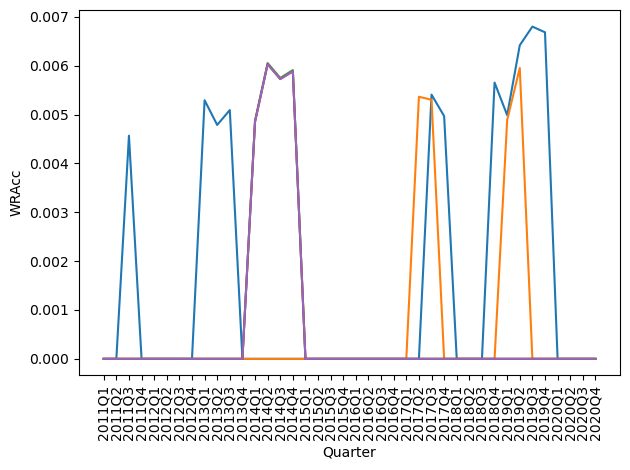

In [231]:
quarter_cols = [c for c in wracc_ts.columns if c not in ["persistence", "emergence", "volatility", "quarter_status", "mean_wracc" ]]
top_groups = wracc_ts.sort_values("volatility", ascending=False).head(5).index

for subgroup in top_groups:
    row = wracc_ts.loc[subgroup]
    plt.plot(quarter_cols, row[quarter_cols].values, label=subgroup)

plt.xticks(rotation=90)
plt.ylabel("WRAcc")
plt.xlabel("Quarter")
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.tight_layout()
plt.show()


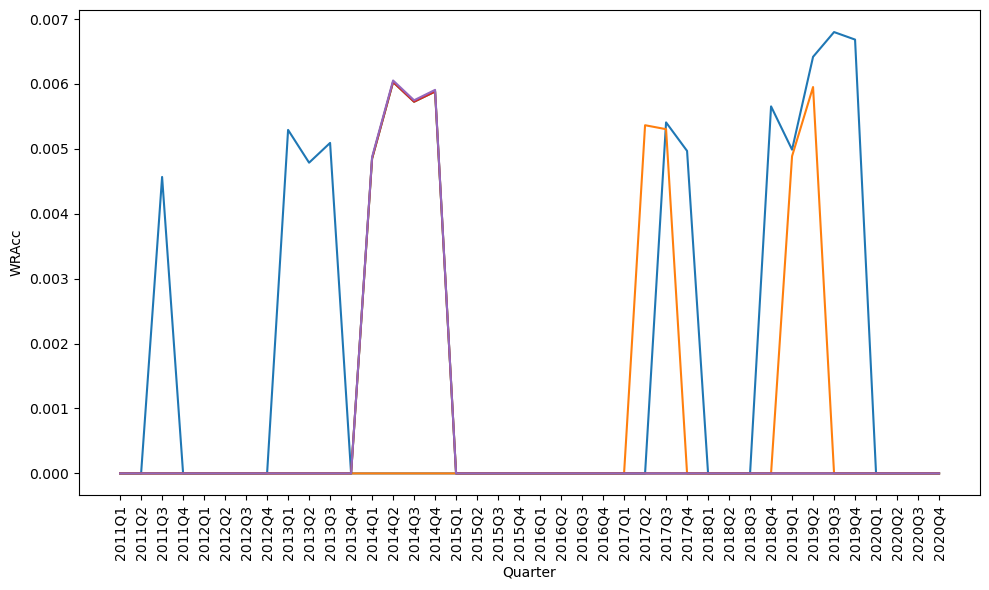

In [233]:
quarter_cols = [c for c in wracc_ts.columns if c not in ["persistence", "emergence", "volatility", "quarter_status", "mean_wracc"]]
top_groups = wracc_ts.sort_values("persistence", ascending=False).head(5).index

plt.figure(figsize=(10,6))
for subgroup in top_groups:
    row = wracc_ts.loc[subgroup]
    plt.plot(quarter_cols, row[quarter_cols].values, label=subgroup)

plt.xticks(rotation=90)
plt.ylabel("WRAcc")
plt.xlabel("Quarter")
# plt.legend(bbox_to_anchor=(0.0, 1.2), loc='upper left',  ncol=2)
plt.tight_layout()
plt.show()


In [265]:
df[(df['Borough_Type'] == "Central_Boroughs") & (df['theft_exception'] == 1)]["theft_z"].mean()

6.086153811528082

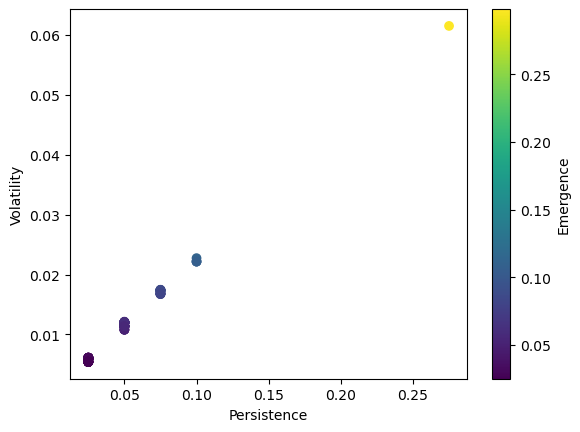

In [34]:
plt.scatter(wracc_ts['persistence'], wracc_ts['volatility'], c=wracc_ts['emergence'], cmap='viridis')
plt.colorbar(label='Emergence')
plt.xlabel('Persistence')
plt.ylabel('Volatility')
plt.show()

<Axes: xlabel='quarter'>

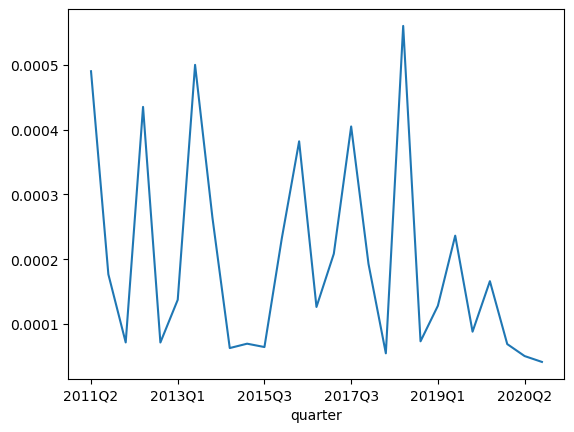

In [281]:
avg_wracc_per_quarter = wracc_ts[wracc_ts.columns[:-5]].mean(axis=0)
avg_wracc_per_quarter.plot(kind='line');

In [153]:
top20 = wracc_ts.sort_values("persistence", ascending=False).head(10).index
top20

Index(['Borough_Type == 'East_Regeneration', pop_female <= 892.0',
       'robbery > 0.0, public_order > 0.819672131147541, violence > 6.095703095970631',
       'violence > 2.5989214585705813, arson_damage > 1.6863406408094437, drugs > 1.6551826164883279',
       'robbery > 0.5526388927065105, public_order > 1.277547239869593, burglary > 2.3969319271332696',
       'robbery > 0.0, violence > 4.844570834001573, public_order > 1.1179436838995478',
       'robbery > 0.0, violence > 4.844570834001573, drugs > 0.9191192013894175',
       'robbery > 0.0, violence > 4.74898236092266, public_order > 1.3633265167007498',
       'robbery > 0.0, public_order > 1.0465724751439038, violence > 5.020538566864445',
       'robbery > 0.0, arson_damage > 1.6411378555798686, violence > 6.053699184051112',
       'public_order > 0.0, violence > 4.2997542997543, burglary > 1.5052684395383844'],
      dtype='object', name='subgroup_str')

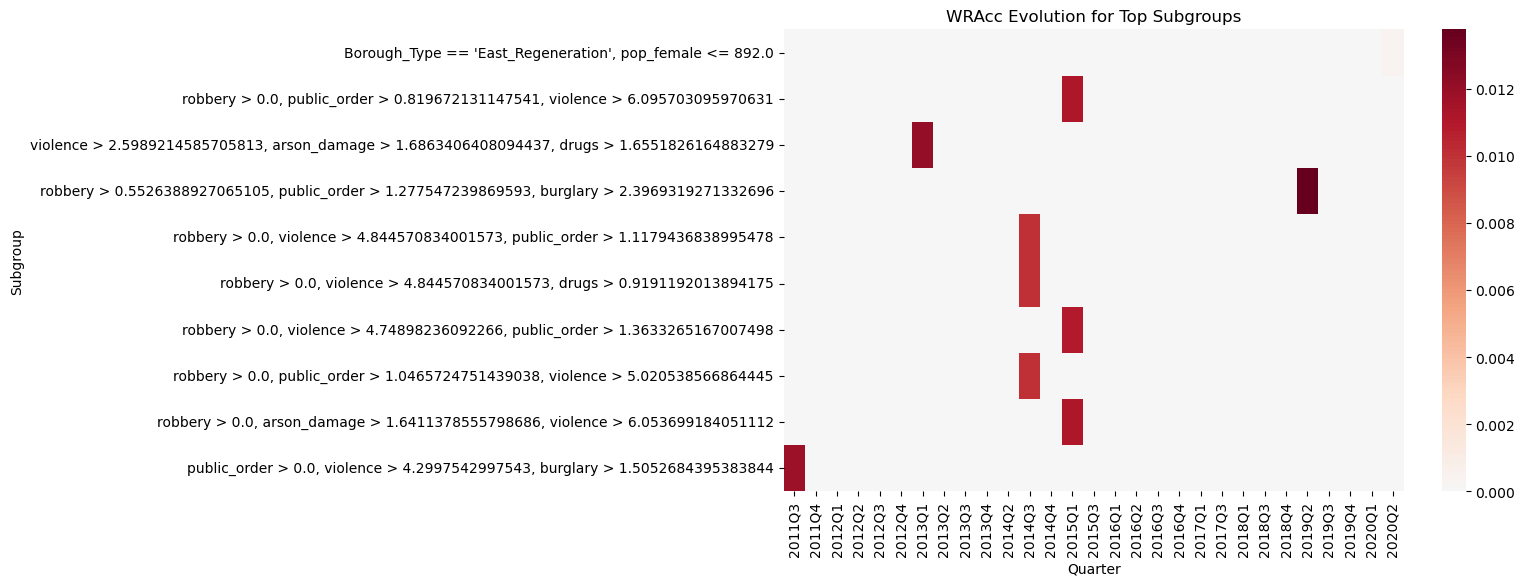

In [159]:
plt.figure(figsize=(10, 6))
sns.heatmap(wracc_ts.loc[top20, wracc_ts.columns[:-5]], cmap='RdBu_r', center=0)
plt.title("WRAcc Evolution for Top Subgroups")
plt.xlabel("Quarter")
plt.ylabel("Subgroup");

In [305]:
if 'mean_wracc' not in wracc_ts.columns:
    wracc_ts['mean_wracc'] = wracc_ts[quarter_cols].mean(axis=1)

ranking_metric = 'volatility'
top10 = wracc_ts.sort_values(by=ranking_metric, ascending=False).head(10)


summary_cols = ['mean_wracc', 'persistence', 'emergence', 'volatility']
summary_table = top10[summary_cols].round(4)

summary_table = summary_table.reset_index().rename(columns={'index': 'Subgroup'})
print(summary_table.to_string(index=False))

                                                                           subgroup_str  mean_wracc  persistence  emergence  volatility
                                                     Borough_Type == 'Central_Boroughs'      0.0236        0.275     0.2980      0.0734
                Borough_Type == 'Central_Boroughs', Borough != 'Kensington and Chelsea'      0.0087        0.100     0.1113      0.0271
               age_median <= 33.9, Borough != 'Wandsworth', Borough != 'Waltham Forest'      0.0023        0.025     0.0311      0.0073
           pop_female <= 831.0, age_median <= 36.1, Borough != 'Hammersmith and Fulham'      0.0023        0.025     0.0309      0.0073
pop_female <= 831.0, age_median <= 36.1, Borough_Type != 'Riverside_Affluent_SouthWest'      0.0023        0.025     0.0309      0.0073
                           pop_female <= 831.0, age_median <= 36.1, Borough != 'Merton'      0.0023        0.025     0.0309      0.0073
                         pop_female <= 831.0, ag